# More visualizations

## Set up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
def print_column_info(df, col_name):
    """
    Print range, completeness, and data type of column with provided name and dataframe
    """
    print(f'COLUMN {col_name} | Range: {df[col_name].min()} to {df[col_name].max()} | NAs: {df[col_name].isna().sum()} | Type: {df[col_name].dtype}')

In [3]:
# load data
df = pd.read_csv('../../data/raw/rawdata_new.csv')

## Weather visualizations

### Do farmers think climate change will have consequences for agriculture in Switzerland?

Quick data exploration - is the data complete, in the expected range, and of the expected type?

In [4]:
# is the data complete, in the expected range, and of the expected type?
print_column_info(df, 'cons_general')

# quick peek at the relevant column
df['cons_general'].head(5)

COLUMN cons_general | Range: 1 to 5 | NAs: 0 | Type: int64


0    4
1    5
2    4
3    4
4    5
Name: cons_general, dtype: int64

Yes, the data is complete, and it is an integer ranging from 1 to 5 inclusive as expected.

<AxesSubplot:xlabel='cons_general', ylabel='Count'>

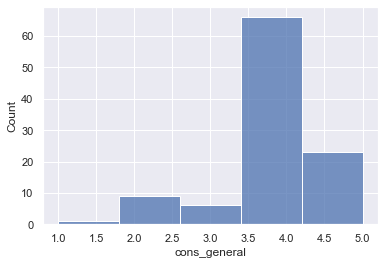

In [5]:
sns.histplot(data=df, x='cons_general', bins=5)

Most farmers expecte negative (rating 4) or very negative consequences (rating 5) of climate change on Swiss agriculture.

I wonder if that is representative of farmers overall, or if there is a self-selection bias - farmers who are concerned about climate change were more likely to take the survey in the first place.

### Do farmers think climate change will have consequences for the economic development of their farm?

Quick data exploration - is the data complete, in the expected range, and of the expected type?

In [6]:
# is the data complete, in the expected range, and of the expected type?
print_column_info(df, 'cons_farm')

# quick peek at the relevant column
df['cons_farm'].head(5)

COLUMN cons_farm | Range: 1 to 5 | NAs: 0 | Type: int64


0    4
1    5
2    4
3    4
4    4
Name: cons_farm, dtype: int64

Yes, the data is complete, and it is an integer ranging from 1 to 5 inclusive as expected.

<AxesSubplot:xlabel='cons_farm', ylabel='Count'>

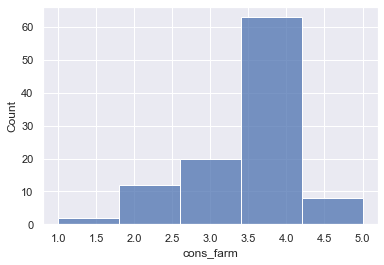

In [7]:
sns.histplot(data=df, x='cons_farm', bins=5)

Most farmers think that climate change will have negative consequences (rating 4) or no consequences (rating 3) for the economic development of their farm.

To me, this suggests that farmers are very concerned about climate change consequences on agriculture in their region, and are concerned (but a little bit less!) about climate change consequences on their farm. It could also be that they are worried about non-economic consequences, too, though. Interesting!

### Do farmers see changing weather patterns?

Quick data exploration - is the data complete, in the expected range, and of the expected type?

In [8]:
# is the data complete, in the expected range, and of the expected type?
for col_index in np.arange(33,39):
    print_column_info(df, df.columns[col_index])

# quick peek at the relevant columns
df.iloc[0:5, 33:39]

COLUMN percep_hail | Range: 1 to 3 | NAs: 0 | Type: int64
COLUMN percep_drought | Range: 1 to 3 | NAs: 0 | Type: int64
COLUMN percep_frost | Range: 1 to 3 | NAs: 0 | Type: int64
COLUMN percep_heavyrain | Range: 1 to 3 | NAs: 0 | Type: int64
COLUMN percep_longrain | Range: 1 to 3 | NAs: 0 | Type: int64
COLUMN percep_heat | Range: 1 to 3 | NAs: 0 | Type: int64


,percep_hail,percep_drought,percep_frost,percep_heavyrain,percep_longrain,percep_heat
0,2,2,2,1,2,2
1,3,2,2,3,3,3
2,2,3,1,1,1,3
3,2,2,2,2,2,2
4,2,3,2,2,1,3


Yes, the data is complete, and all columns are integers ranging from 1 to 3 inclusive as expected.

In [9]:
# create new dataframe with perception data
percep_df = df.iloc[:, 33:39].copy()
# reshape from wide to long format
percep_df = pd.melt(percep_df, var_name='weather_event', value_name='rating')
# rename variables
percep_df['weather_event'] = [t[7:] for t in percep_df['weather_event']]
# check out result
percep_df.sample(5)

,weather_event,rating
381,heavyrain,3
369,heavyrain,2
402,heavyrain,1
606,heat,3
88,hail,2


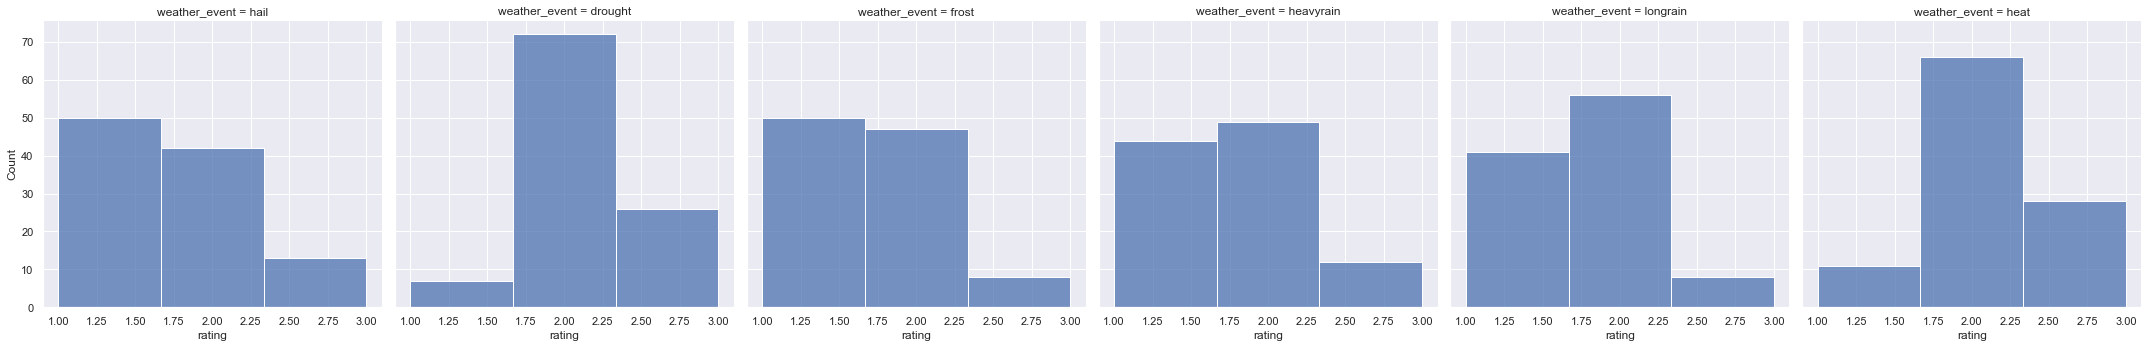

In [10]:
# visualize pereption for each event
sns.displot(percep_df, x='rating', col='weather_event', bins=3)

The question reads: How did you perceive the frequency of extreme weather events over the past 10 years on your farm? A rating of 1 indicates no change, 2 indicates increase or decrease, 3 indicates strong increase or strong decrease. It seems that farmers see the strongest changes in drought and heat, and the weakest changes in hail and frost. There aren't any polarizing patterns here, either, where farmers think there is a strong change or no change and few see a moderate change.

Now, I'll check out farmers' average rating to this group of questions, and see whether farmers are seeing changes in general. I wonder if some farmers think more events are changing than other farmers do. Ill aggregate by the mean to keep the same interpretation - if a farmer has a rating of 1, then they see no change in all events; if a farmer has a rating of 3, then they see strong changes in all events.

In [11]:
# create perception average column
df['percep_avg'] = np.mean(df.iloc[:, 33:39], axis=1)
# quick check of the new column
print_column_info(df, 'percep_avg')
# check out a sample of the data
df['percep_avg'].sample(5)

COLUMN percep_avg | Range: 1.0 to 3.0 | NAs: 0 | Type: float64


52     1.500000
100    1.833333
102    1.833333
4      2.166667
58     1.000000
Name: percep_avg, dtype: float64

<AxesSubplot:xlabel='percep_avg', ylabel='Count'>

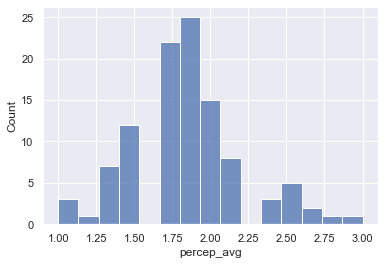

In [12]:
sns.histplot(data=df, x='percep_avg')

It's a fairly normal looking distribution. Most farmers have average ratings around 2 and report an increase or decrease in weather events over the last decade on their farm. Few farmers have average ratings of 1 or 3, reporting no or strong increases in all weather events.

## Self efficacy visualizations

### Do farmers think they can have a positive and active role in mitigating climate change?

Quick data exploration - is the data complete, in the expected range, and of the expected type?

In [13]:
# is the data complete, in the expected range, and of the expected type?
for col_index in np.arange(40,45):
    print_column_info(df, df.columns[col_index])

# quick peek at the relevant columns
df.iloc[0:5, 40:45]

COLUMN self_reduc | Range: 1 to 5 | NAs: 0 | Type: int64
COLUMN self_act | Range: 1 to 5 | NAs: 0 | Type: int64
COLUMN self_cap | Range: 1 to 5 | NAs: 0 | Type: int64
COLUMN self_conf | Range: 1 to 5 | NAs: 0 | Type: int64
COLUMN self_not | Range: 1 to 5 | NAs: 0 | Type: int64


,self_reduc,self_act,self_cap,self_conf,self_not
0,1,4,1,1,4
1,3,3,2,2,2
2,2,1,2,3,1
3,3,3,4,4,2
4,1,2,2,2,2


Yes, the data is complete, and all columns are integers ranging from 1 to 5 inclusive as expected.

One important note about the questions here. They are all asking about the farmer's role in climate change mitigation. The questions are:
* `self_reduc`: I can do something about climate change on my farm by reducing greenhouse gases.
* `self_act`: My behavior as a farmer influences climate change.
* `self_cap`: How successfully I can reduce greenhouse gases on the farm depends mainly on my skills as a farmer.
* `self_conf`: I am confident that I can reduce greenhouse gases and at the same time produce successfully.
* `self_not`: Climate change is a problem I can not change.
A rating of 1 means I do not agree at all. A rating of 5 means I fully agree. A higher score in the first four questions indicates a farmer sees themselves as playing an active and potentially positive role in mitigation. A higher score on the last indicates a farmer sees themselves as unable to play a role in mitigation.

In [14]:
# create new dataframe with self efficacy data
self_df = df.iloc[:, 40:45].copy()
# reshape from wide to long format
self_df = pd.melt(self_df, var_name='self', value_name='rating')
# rename variables
self_df['self'] = [t[5:] for t in self_df['self']]
# check out result
self_df.sample(5)

,self,rating
307,cap,3
481,not,4
339,conf,2
519,not,3
401,conf,1


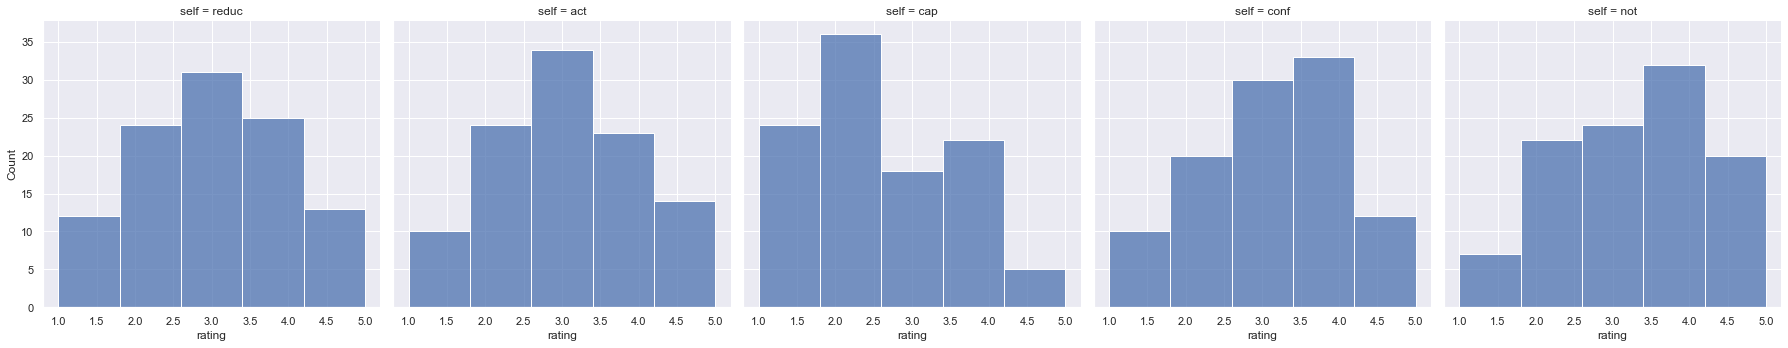

In [15]:
# visualize pereption for each event
sns.displot(self_df, x='rating', col='self', bins=5)

Unlike weather observations, farmers are pretty neutral across the self efficacy questions. Most farmers neither agree nor disagree that they can reduce greenhouse gases on their farm to do something about climate change, or that their behavior influences climate change. Most farmers disagree that successful greenhouse gas reduction depends on farming skills. Most farmers are confident they can reduce greenhouse gases while producing successfully. And most farmers agree that climate change is a problem they cannot change.

This is a bit sad! Seems like overall, the farmers who completed the survey don't thin they can play a part in climate change mitigation. Based on that alone, I would recommend more positive messaging about mitigation measures.

Now, I'll take a look at self efficacy in general, for the first four questions, where higher means more agreement that farmers play a role.

In [16]:
# create self efficacy average column for first four questions
df['self_avg'] = np.mean(df.iloc[:, 40:44], axis=1)
# quick check of the new column
print_column_info(df, 'self_avg')
# check out a sample of the data
df['self_avg'].sample(5)

COLUMN self_avg | Range: 1.0 to 4.75 | NAs: 0 | Type: float64


5     2.75
69    4.00
80    2.75
60    3.00
62    1.25
Name: self_avg, dtype: float64

<AxesSubplot:xlabel='self_avg', ylabel='Count'>

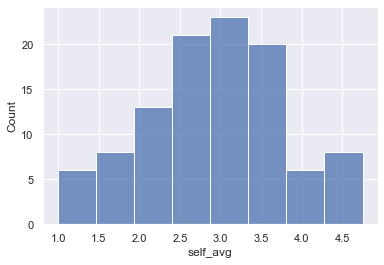

In [17]:
sns.histplot(data=df, x='self_avg')

In general, farmers are neutral as to whether they play a role in mitigating climate change. To some degree, that's fair. If you asked me about the power of an individual in a global-scale problem, I may not bo oberly optimistic either.

Is there a relationship between the first four (more active, optimistic framing) and the last (more passive, pessimistic framing) question?

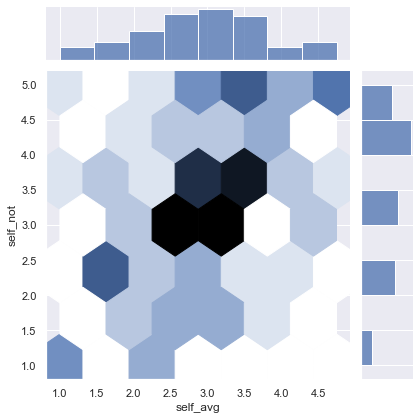

In [18]:
# plot aggregated first four questions against last question about self efficacy
sns.jointplot(data=df, x='self_avg', y='self_not', kind='hex')

Not too much of a trend to write home about here. As seen in the faceted histograms earlier, most farmers are netural in their self efficacy, and many agree climate change is not a problem they can solve.

## Connection visualizations

One learning I had from the Wikipedia page about the early adoption of innovations was that better connected rural areas are faster to adopt innovations. I'll test this relationship later, but for now, I want to get an idea of how connected the farmers reported being on their survey.

I also want to be careful here (and I should have been more careful in my interpretations earlier) - I can't know how many connections farmers actually have from this data, I only know how many they report. And this is towards the end of a rather long survey. As with all the survey information, I'm assuming what farmers report is a reasonably accurate reflection of reality.

### How many connections do farmers report?

Quick data exploration - is the data complete, in the expected range, and of the expected type?

In [19]:
# find column names related to social importance
network_importance_columns = [c for c in df.columns if c[-4:] == '_imp']

# quick data exploration - is the data complete, in the expected range, and of the expected type?
for c in network_importance_columns: 
    print_column_info(df, c)

COLUMN net_name1_imp | Range: 1 to 3 | NAs: 0 | Type: int64
COLUMN net_name2_imp | Range: 1.0 to 3.0 | NAs: 22 | Type: float64
COLUMN net_name3_imp | Range: 1.0 to 3.0 | NAs: 32 | Type: float64
COLUMN net_name4_imp | Range: 1.0 to 3.0 | NAs: 44 | Type: float64
COLUMN net_name5_imp | Range: 1.0 to 3.0 | NAs: 57 | Type: float64
COLUMN net_name6_imp | Range: 1.0 to 3.0 | NAs: 66 | Type: float64
COLUMN net_name7_imp | Range: 1.0 to 3.0 | NAs: 72 | Type: float64
COLUMN net_name8_imp | Range: 1.0 to 3.0 | NAs: 77 | Type: float64
COLUMN net_name9_imp | Range: 1.0 to 3.0 | NAs: 79 | Type: float64
COLUMN net_name10_imp | Range: 1.0 to 3.0 | NAs: 85 | Type: float64


Yes, all columns are integers or floats ranging from 1 to 3 inclusive as expected. Unlike previous columns, the data is not complete. As the number of connections increases, the frequency of farmers reporting a connection decreases. All farmers list at least one connection. Only 20 farmers list the maximum of 10 connections.

1     22
10    20
4     13
3     12
2     10
5      9
6      6
9      6
7      5
8      2
Name: num_conn, dtype: int64


<AxesSubplot:xlabel='num_conn', ylabel='Count'>

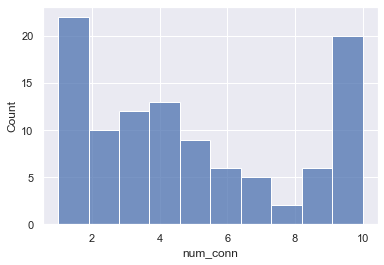

In [20]:
# create a column that counts the number of importance ratings provided
df['num_conn'] = df[network_importance_columns].notnull().sum(axis=1)
print(df['num_conn'].value_counts())
sns.histplot(data=df, x='num_conn', bins=10)

There is a bimodal distribution to the number of connections reported. 22 farmers report the minimum number of connections, 1, and 20 farmers report the maximum number of connections, 10.

### Is there a relationship between the number of connections reported and the time it took to fill out the survey?

<AxesSubplot:xlabel='num_conn', ylabel='interviewtime'>

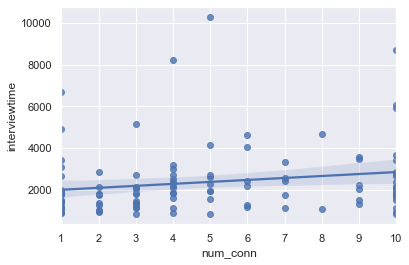

In [21]:
# plot number of connections versus interview completion time
sns.regplot(data=df, x='num_conn', y='interviewtime')

There is a positive relationship here, but there's a range to completion times across all connection counts reported. (I had gotten all excited, as though this question's completion could be a proxy of interviewer effort or overall completeness, but that's a bit of a leap. Some people may just remember or have more connections than others.)

### Do farmers have many or few important or not important connections?

In [40]:
# create a column that counts the number of importance ratings of 1, 2 and 3
df['num_conn_very_imp'] = (df[network_importance_columns] == 1).sum(axis=1)
df['num_conn_imp'] = (df[network_importance_columns] == 2).sum(axis=1)
df['num_conn_not_imp'] = (df[network_importance_columns] == 3).sum(axis=1)

<AxesSubplot:xlabel='num_conn_not_imp', ylabel='Count'>

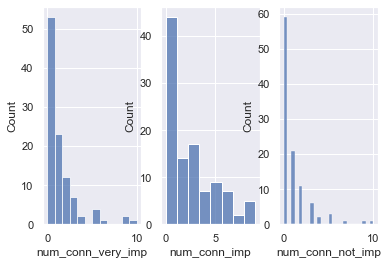

In [42]:
# WIP
fig, ax = plt.subplots(1,3)
sns.histplot(data=df, x='num_conn_very_imp', ax=ax[0])
sns.histplot(data=df, x='num_conn_imp', ax=ax[1])
sns.histplot(data=df, x='num_conn_not_imp', ax=ax[2])